<a href="https://colab.research.google.com/github/slee159/edu/blob/master/16%EC%9D%BC%EC%B0%A8_200818_(1)_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


## 1. 개요(목차는 ##로 만듦)
- IRIS 붓꽃 분류 모형을 만든다.

### (1) 패키지 불러오기 (아래 level은 ###로 만듦)
- sklearn 패키지를 불러온다.

### (2) 데이터 불러오기
- sklearn 패키지 내장 데이터 있음

In [5]:
from sklearn.datasets import load_iris

iris = load_iris() # IRIS 내장 데이터는 Bunch 형태의 데이터셋으로 구성되어 있음

# 독립변수로 구성된 데이터
iris_data = iris.data

# 종속변수
iris_label = iris.target
print('iris target 값 :', iris_label[[0,50,100]]) # iris의 0번째, 50번째, 100번째 값을 출력
print('iris target 명 :', iris.target_names)



iris target 값 : [0 1 2]
iris target 명 : ['setosa' 'versicolor' 'virginica']


### (3) 데이터 전처리
- 상황: 현재 iris 데이터는 NumPy 형태, 리스트 형태임
- 방법: pandas를 활용해서, 데이터 프레임 만들기


In [21]:
import pandas as pd
iris_df = pd.DataFrame(iris_data,columns = ['Sepal Length', "Sepal Width", 'Petal Length', 'Petal Width'] )
iris_df.head(5)

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# stackoverflow.com/a/46379878/1840471

from sklearn import datasets
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_iris = sklearn_to_df(load_iris())
print(df_iris.head(3).to_markdown())

|    |   sepal length (cm) |   sepal width (cm) |   petal length (cm) |   petal width (cm) |   target |
|---:|--------------------:|-------------------:|--------------------:|-------------------:|---------:|
|  0 |                 5.1 |                3.5 |                 1.4 |                0.2 |        0 |
|  1 |                 4.9 |                3   |                 1.4 |                0.2 |        0 |
|  2 |                 4.7 |                3.2 |                 1.3 |                0.2 |        0 |


### (4) 데이터 시각화
- 시각화를 위한 전처리


In [33]:
temp_data = df_iris.copy()

# column 명 바꾸기
temp_data.columns = ['Sepal Length', "Sepal Width", 'Petal Length', 'Petal Width','species']
temp_data.info()

# map ( 0 -> "setosa") 
replace_fct = {0: "setosa", 1: "versicolor", 2: "virginica"}

temp_data['species'] = temp_data['species'].map(replace_fct)
print(temp_data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
   Sepal Length  Sepal Width  Petal Length  Petal Width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa


- 수치형 데이터, 히스토그램 & 박스플롯 & 산점도

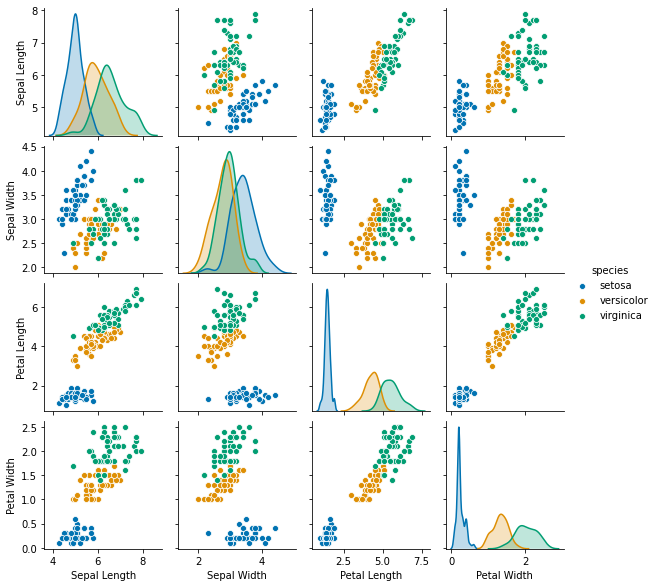

In [44]:
import seaborn as sns
sns.pairplot(temp_data, hue="species", height = 2, palette = 'colorblind')

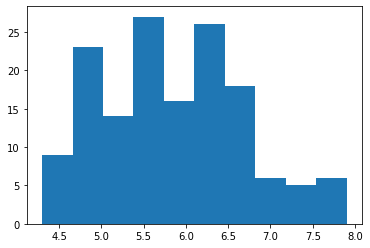

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(temp_data['Sepal Length'])
plt.show()

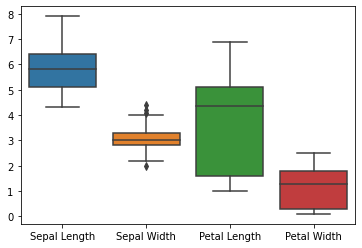

In [46]:
sns.boxplot(data=temp_data)

### (5) 데이터셋 분리
- 학습용 데이터와 테스트용 데이터 분리

In [49]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split

from sklearn.model_selection import train_test_split

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label,
                                                    test_size = 0.2,
                                                    random_state =1)


- arrays
- test_size : 비율 (훈련데이터 / 테스트데이터)
- random_state : 실험의 재현성을 위한 코드 (아무 숫자나 기입해도 상관 없음)

### (6) 머신러닝 모형 학습
- 머신러닝 모형 만들기

In [62]:
from sklearn.tree import DecisionTreeClassifier

# 객체 생성
dt_clf = DecisionTreeClassifier(random_state = 1)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

### (7) 모형 테스트
- 모형 예측

In [65]:
from sklearn.metrics import accuracy_score
pred = dt_clf.predict(X_test)
print("The accuracy of the Decision Tree is {:.3f}".format(accuracy_score(pred, y_test)))

The accuracy of the Decision Tree is 0.967


- 시각화

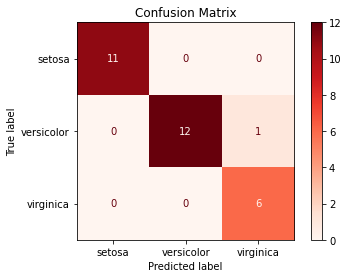

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix

labels = ['setosa', 'versicolor', 'virginica']
disp = plot_confusion_matrix(dt_clf, 
                             X_test, y_test, 
                             display_labels=labels, 
                             cmap=plt.cm.Reds, 
                             normalize=None)
disp.ax_.set_title('Confusion Matrix');